<a href="https://colab.research.google.com/github/AldousSama/Tarea1/blob/main/TAREA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
(1) #Diseñar una capa en keras que transforme imagenes a color en escala de grises

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
datos, metadatos = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True) #carga un conjunto de datos de TensorFlow llamado 'cats_vs_dogs

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteXMRLCN/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


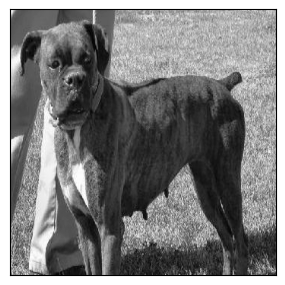

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
tamaño=10000
plt.figure(figsize=(20,20)) #Solo para que se vea más grande
for i, (imagen, etiqueta) in enumerate(datos['train'].take(1)):
  imagen = cv2.resize(imagen.numpy(), (tamaño, tamaño)) #Aquí lo que hago es redimensionar el tamaño de las imagenes a uno para todos
  imagen = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagen, cmap='gray') #aquí indico que solo usaré un solo canal de color

In [ ]:
(2) #Entrena una red neuronal para que reproduzca las siguientes funciones en el  intervalo  de [-1,1]

In [ ]:
#Primero lo que haré será generar datos de entrenamiento para las funciones, para luego poder utilizar esos datos para entrenar la red.

In [ ]:
def function_a(x):
  return 3 * np.sin(np.pi*x)   #Aquí defino las funciones que quiero reproducir
def function_b(x):
  return 1 + 2 * x + 4 * x**3
#Ahora sí, tengo que generar los datos de entrenamiento, es conveniente utilizar el np.random.
np.random.seed(0)
X_train = np.random.uniform(-1, 1, 1000) #Esto nos indica que tendremos 100 datos generados dentro del intervalo, cree más datos de entrenamiento
y_train_a = function_a(X_train)
y_train_b = function_b(X_train)

32/32 [==============================] - 0s 2ms/step


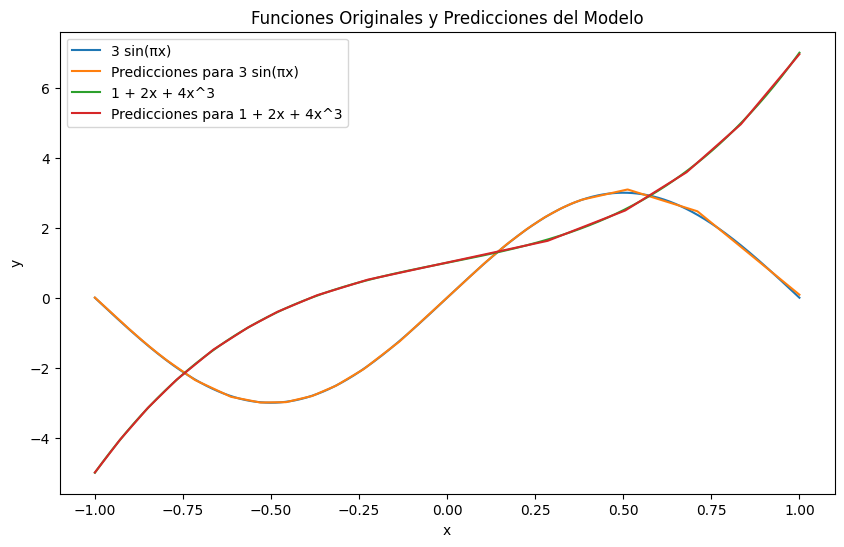

In [ ]:
# Definir el modelo de la red neuronal para la función A
modelo_funcion_a = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
modelo_funcion_a.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para la función A
modelo_funcion_a.fit(X_train, y_train_a, epochs=1000, verbose=0)

# Definir el modelo de la red neuronal para la función B
modelo_funcion_b = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
modelo_funcion_b.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo para la función B
modelo_funcion_b.fit(X_train, y_train_b, epochs=1000, verbose=0)

# Predecir valores usando los modelos entrenados
x_values = np.linspace(-1, 1, 1000)
predicciones_funcion_a = modelo_funcion_a.predict(x_values)
predicciones_funcion_b = modelo_funcion_b.predict(x_values)

# Visualizar las funciones originales y las predicciones del modelo
plt.figure(figsize=(10, 6))
plt.plot(x_values, function_a(x_values), label='3 sin(πx)')
plt.plot(x_values, predicciones_funcion_a, label='Predicciones para 3 sin(πx)')
plt.plot(x_values, function_b(x_values), label='1 + 2x + 4x^3')
plt.plot(x_values, predicciones_funcion_b, label='Predicciones para 1 + 2x + 4x^3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Funciones Originales y Predicciones del Modelo')
plt.show()

In [ ]:
# (3) Diseñar una capa entrenable que represente un polinomio grado 3

In [ ]:
class PolynomialLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(PolynomialLayer, self).__init__()
        # Definir los coeficientes entrenables
        self.a0 = self.add_weight("a0", shape=(1,), initializer="random_normal")
        self.a1 = self.add_weight("a1", shape=(1,), initializer="random_normal")
        self.a2 = self.add_weight("a2", shape=(1,), initializer="random_normal")
        self.a3 = self.add_weight("a3", shape=(1,), initializer="random_normal")

    def call(self, inputs):
        # Calcular el valor del polinomio
        x = inputs
        result = self.a0 + self.a1 * x + self.a2 * x**2 + self.a3 * x**3
        return result

In [ ]:
#Ahora generare los datos de entrenamiento

7/7 [==============================] - 0s 3ms/step
Porcentaje de precisión (R^2): 0.9919
32/32 [==============================] - 0s 2ms/step


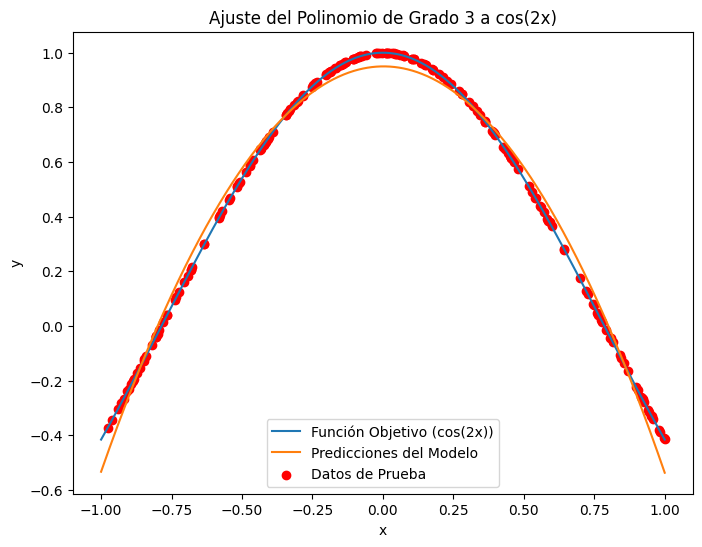

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Defino la función objetivo
def funcion_obj(x):
    return np.cos(2 * x)

# Generar datos de entrenamiento
np.random.seed(0)
X = np.random.uniform(-1, 1, 1000)
y = funcion_obj(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo con la capa del polinomio de grado 3
modelo = tf.keras.Sequential([
    PolynomialLayer(),
])

# Compilar el modelo
modelo.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=1000, verbose=0)

# Evaluar el modelo en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el porcentaje de precisión (R^2)
r2 = r2_score(y_test, y_pred)

# Imprimir el porcentaje de precisión
print(f'Porcentaje de precisión (R^2): {r2:.4f}')

# Generar datos para graficar la función objetivo y las predicciones del modelo
x_values = np.linspace(-1, 1, 1000)
y_target = funcion_obj(x_values)
y_pred = modelo.predict(x_values)

# Graficar la función objetivo y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_target, label='Función Objetivo (cos(2x))')
plt.plot(x_values, y_pred, label='Predicciones del Modelo')
plt.scatter(X_test, y_test, color='red', marker='o', label='Datos de Prueba')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Ajuste del Polinomio de Grado 3 a cos(2x)')
plt.show()

In [ ]:
#Entrenar una red neuronal que de la solucion de las siguientes ecuaciones diferenciales en el el intervalo [-5,5].  Graficar la solucion numerica junto con la solucion analıtica

Epoch 1/130
625/625 [==============================] - 3s 3ms/step - loss: 0.0670
Epoch 2/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0522
Epoch 3/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0499
Epoch 4/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0491
Epoch 5/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0487
Epoch 6/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0485
Epoch 7/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0482
Epoch 8/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0479
Epoch 9/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0476
Epoch 10/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0472
Epoch 11/130
625/625 [==============================] - 2s 3ms/step - loss: 0.0468
Epoch 12/130
625/625 [==============================] - 1s 2ms/step - loss: 0.0464
Epoch 13/130


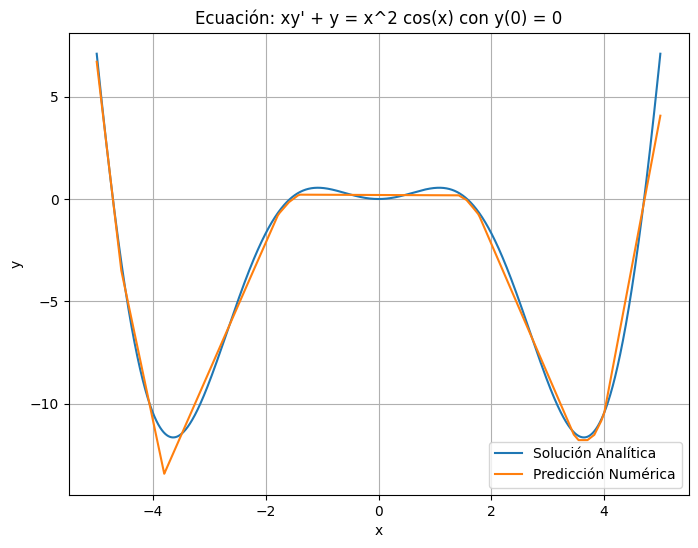

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definir el conjunto de datos de entrenamiento
x_train = np.linspace(-5, 5, 20000)
y_train = x_train**2 * np.cos(x_train)

# Normalizar los datos
x_train_normalized = (x_train - x_train.min()) / (x_train.max() - x_train.min())
y_train_normalized = (y_train - y_train.min()) / (y_train.max() - y_train.min())

# Diseñar la arquitectura de la red neuronal
model = Sequential()
model.add(Dense(64, input_shape=(1,), activation='relu'))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(x_train_normalized, y_train_normalized, epochs=130, batch_size=32, verbose=1)

# Predecir los valores y desnormalizar las predicciones
y_pred_normalized = model.predict(x_train_normalized)
y_pred = y_pred_normalized * (y_train.max() - y_train.min()) + y_train.min()


# Graficar la solución numérica y analítica
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, label='Solución Analítica')
plt.plot(x_train, y_pred, label='Predicción Numérica')
plt.title('Ecuación: xy\' + y = x^2 cos(x) con y(0) = 0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/200
63/63 [==============================] - 2s 6ms/step - loss: 0.1686
Epoch 2/200
63/63 [==============================] - 0s 6ms/step - loss: 0.0337
Epoch 3/200
63/63 [==============================] - 0s 6ms/step - loss: 0.0125
Epoch 4/200
63/63 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 5/200
63/63 [==============================] - 0s 5ms/step - loss: 5.1097e-04
Epoch 6/200
63/63 [==============================] - 0s 5ms/step - loss: 5.0040e-04
Epoch 7/200
63/63 [==============================] - 0s 6ms/step - loss: 5.1223e-04
Epoch 8/200
63/63 [==============================] - 1s 10ms/step - loss: 5.0324e-04
Epoch 9/200
63/63 [==============================] - 0s 8ms/step - loss: 5.0192e-04
Epoch 10/200
63/63 [==============================] - 0s 5ms/step - loss: 5.0118e-04
Epoch 11/200
63/63 [==============================] - 0s 4ms/step - loss: 5.0171e-04
Epoch 12/200
63/63 [==============================] - 0s 5ms/step - loss: 4.9769e-04
Epoc

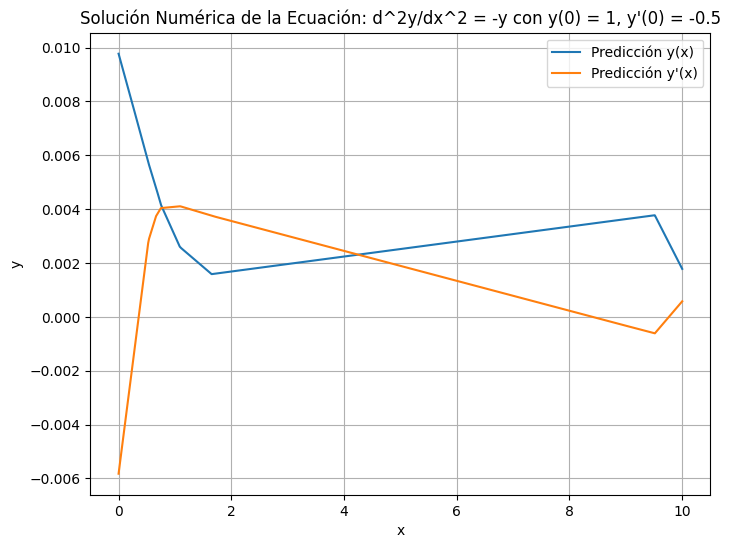

In [1]:
#Para resolver esta ecuación diferencial utilizando una red neuronal, primero necesitas convertirla en un sistema de dos ecuaciones de primer orden.

# Defino el conjunto de datos de entrenamiento
x_train = np.linspace(0, 10, 2000)
y_train = np.zeros_like(x_train)
v_train = np.zeros_like(x_train)
y_train[0] = 1  # Condición inicial y(0) = 1
v_train[0] = -0.5  # Condición inicial y'(0) = -0.5

# Normalizamos los datos
x_train_normalized = (x_train - x_train.min()) / (x_train.max() - x_train.min())
y_train_normalized = (y_train - y_train.min()) / (y_train.max() - y_train.min())
v_train_normalized = (v_train - v_train.min()) / (v_train.max() - v_train.min())


model = Sequential()
model.add(Dense(64, input_shape=(1,), activation='relu'))
model.add(Dense(64, activation='relu'))  # Agregamos otra capa oculta para mayor complejidad
model.add(Dense(2))  # Dos salidas: una para y y otra para v

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
model.fit(x_train_normalized, np.column_stack((y_train_normalized, v_train_normalized)), epochs=200, batch_size=32, verbose=1)

# Predecir los valores y desnormalizar las predicciones
y_pred_normalized, v_pred_normalized = model.predict(x_train_normalized).T
y_pred = y_pred_normalized * (y_train.max() - y_train.min()) + y_train.min()
v_pred = v_pred_normalized * (v_train.max() - v_train.min()) + v_train.min()

# Graficar la solución numérica y analítica
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_pred, label='Predicción y(x)')
plt.plot(x_train, v_pred, label="Predicción y'(x)")
plt.title("Solución Numérica de la Ecuación: d^2y/dx^2 = -y con y(0) = 1, y'(0) = -0.5")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from sklearn.metrics import mean_squared_error
mse_y = mean_squared_error(y_train, y_pred)
mse_v = mean_squared_error(v_train, v_pred)
print(f'MSE para y(x): {mse_y}')
print(f'MSE para y\'(x): {mse_v}')


MSE para y(x): 0.0005010531746496712
MSE para y'(x): 0.00012744926238070198


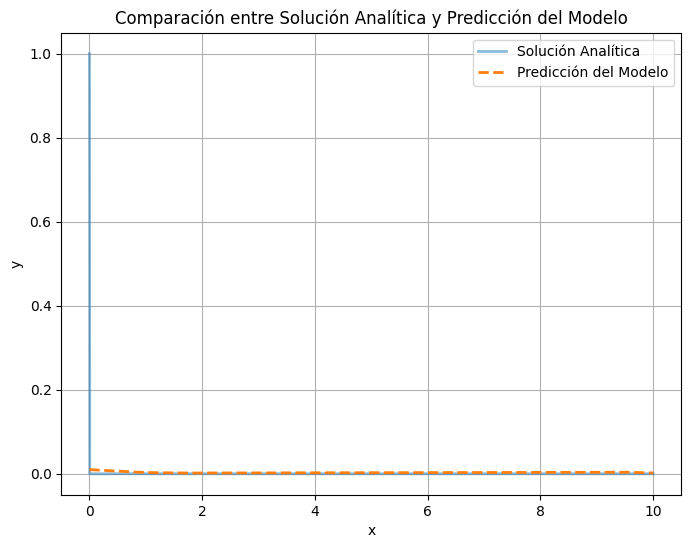

In [4]:
import matplotlib.pyplot as plt

# Graficar la solución analítica y las predicciones del modelo
plt.figure(figsize=(8, 6))
plt.plot(x_train, y_train, label='Solución Analítica', linewidth=2, alpha=0.5)  # Ajusta el valor de alpha según sea necesario
plt.plot(x_train, y_pred, label='Predicción del Modelo', linestyle='dashed', linewidth=2)
plt.title('Comparación entre Solución Analítica y Predicción del Modelo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
